### colour patellete used -
#cb997e

#eddcd2

#fff1e6

#f0efeb

#ddbea9 

#a5a58d

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, clear_output

In [3]:
meesho = pd.read_csv('Meesho_Orders.csv')

In [4]:
meesho['SupplierListedPrice'] = meesho['SupplierListedPrice'].astype(float)
meesho['SupplierDiscountedPrice'] = meesho['SupplierDiscountedPrice'].astype(float)
meesho['discount'] = meesho['SupplierListedPrice']*meesho['Quantity'] - meesho['SupplierDiscountedPrice']

In [5]:
meesho = meesho.drop(columns=['create_time', 'update_time','account_id'])

In [6]:
meesho

,ReasonforCreditEntry,SubOrderNo,OrderDate,CustomerState,ProductName,SKU,Size,Quantity,SupplierListedPrice,SupplierDiscountedPrice,PacketId,discount
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,0.0,NaN,0.0
1,DELIVERED,100029636931_1,2023-08-22 00:00:00,West Bengal,Furshine Universal Triple Seater Sofa Cover Bi...,TRIPLE_SOFA_COVER_BLA_PRISM,Free Size,1,1049.0,1049.0,NaN,0.0
2,DELIVERED,100030804488_1,2024-03-17 00:00:00,Tamil Nadu,Furshine Universal Triple Seater Sofa Cover Bi...,TRIPLE_SOFA_COVER_BLEND_GEOMETRIC,Free Size,1,1044.0,940.0,NaN,104.0
3,DELIVERED,100035318894_1,2023-10-06 00:00:00,Madhya Pradesh,Furshine Universal Triple Seater Sofa Cover Bi...,TRIPLE_SOFA_COVER_BLA_PRISM,Free Size,1,999.0,900.0,NaN,99.0
4,DELIVERED,100066941702_1,2023-12-03 00:00:00,Bihar,Furshine Single Seater Sofa Cover Big Elastici...,SINGLE_SOFA_COVER_BLU_DIAMOND_3,Free Size,1,700.0,700.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
86323,Delivered,999870400904_1,2022-12-03 00:00:00,NaN,Boxn Stainless Steel Electric Kettle 2 Liter D...,Kettle_N,Free Size,1,430.0,430.0,NaN,0.0
86324,DELIVERED,999877171396_1,2024-01-14 00:00:00,Rajasthan,Furshine Universal Single Seater Sofa Cover Bi...,107663237,Free Size,1,649.0,649.0,NaN,0.0
86325,DELIVERED,999892846612_1,2023-10-11 00:00:00,Madhya Pradesh,Furshine Universal Single Seater Sofa Cover Bi...,107663237,Free Size,1,649.0,649.0,NaN,0.0
86326,Delivered,99990071_1,2019-02-22 00:00:00,NaN,Hand Glove,HG-001,Free Size,1,41.0,41.0,NaN,0.0


In [7]:
meesho = meesho.drop(columns=['PacketId'])

In [8]:
meesho = meesho.dropna(subset=['ProductName'])


In [9]:
null_counts = meesho.isnull().sum()
print(null_counts)

ReasonforCreditEntry           0
SubOrderNo                     0
OrderDate                      0
CustomerState              42442
ProductName                    0
SKU                            1
Size                           0
Quantity                       0
SupplierListedPrice            0
SupplierDiscountedPrice        0
discount                       0
dtype: int64


In [10]:
meesho['Product_Name'] = meesho['ProductName'].str.split().str[0].str.strip().str.lower()
meesho['Product_Name'] = meesho['Product_Name'].str.strip().str.replace('"', '').str.upper()
meesho = meesho.drop(['SKU'], axis=1)

In [11]:
meesho

,ReasonforCreditEntry,SubOrderNo,OrderDate,CustomerState,ProductName,Size,Quantity,SupplierListedPrice,SupplierDiscountedPrice,discount,Product_Name
1,DELIVERED,100029636931_1,2023-08-22 00:00:00,West Bengal,Furshine Universal Triple Seater Sofa Cover Bi...,Free Size,1,1049.0,1049.0,0.0,FURSHINE
2,DELIVERED,100030804488_1,2024-03-17 00:00:00,Tamil Nadu,Furshine Universal Triple Seater Sofa Cover Bi...,Free Size,1,1044.0,940.0,104.0,FURSHINE
3,DELIVERED,100035318894_1,2023-10-06 00:00:00,Madhya Pradesh,Furshine Universal Triple Seater Sofa Cover Bi...,Free Size,1,999.0,900.0,99.0,FURSHINE
4,DELIVERED,100066941702_1,2023-12-03 00:00:00,Bihar,Furshine Single Seater Sofa Cover Big Elastici...,Free Size,1,700.0,700.0,0.0,FURSHINE
5,Delivered,10006773_1,2019-02-22 00:00:00,NaN,Premium Choice Unique Matte Lipstick,Free Size,1,44.0,44.0,0.0,PREMIUM
...,...,...,...,...,...,...,...,...,...,...,...
86323,Delivered,999870400904_1,2022-12-03 00:00:00,NaN,Boxn Stainless Steel Electric Kettle 2 Liter D...,Free Size,1,430.0,430.0,0.0,BOXN
86324,DELIVERED,999877171396_1,2024-01-14 00:00:00,Rajasthan,Furshine Universal Single Seater Sofa Cover Bi...,Free Size,1,649.0,649.0,0.0,FURSHINE
86325,DELIVERED,999892846612_1,2023-10-11 00:00:00,Madhya Pradesh,Furshine Universal Single Seater Sofa Cover Bi...,Free Size,1,649.0,649.0,0.0,FURSHINE
86326,Delivered,99990071_1,2019-02-22 00:00:00,NaN,Hand Glove,Free Size,1,41.0,41.0,0.0,HAND


In [12]:
meesho.dtypes

ReasonforCreditEntry        object
SubOrderNo                  object
OrderDate                   object
CustomerState               object
ProductName                 object
Size                        object
Quantity                     int64
SupplierListedPrice        float64
SupplierDiscountedPrice    float64
discount                   float64
Product_Name                object
dtype: object

### 1st slide

Percentages of top 5 and 'Others':
FURSHINE         60.366977
BOXN             19.537341
FURSHINETHREE     1.727154
WHITECHERRY       1.561505
PINK              1.493160
Others           15.313865
dtype: float64


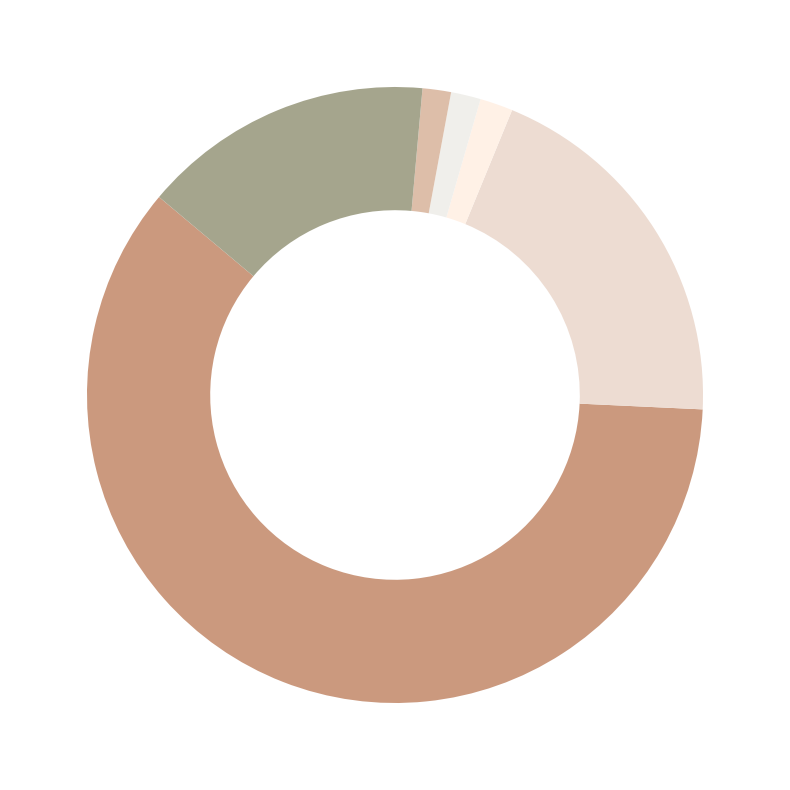

In [13]:
colors = ['#cb997e','#eddcd2','#fff1e6','#f0efeb','#ddbea9','#a5a58d']
word_counts = meesho['Product_Name'].value_counts()
word_counts_top5 = word_counts.nlargest(5)
others_count = word_counts[~word_counts.index.isin(word_counts_top5.index)].sum()
word_counts_combined = pd.concat([word_counts_top5, pd.Series({'Others': others_count})])

percentages_combined = (word_counts_combined / word_counts_combined.sum()) * 100
print("Percentages of top 5 and 'Others':")
print(percentages_combined)


plt.figure(figsize=(10, 10))

wedges, texts = plt.pie(
    word_counts_combined,
    labels=None,  # No labels
    autopct=None,
    startangle=140,
    colors=colors[:len(word_counts_combined)],
    wedgeprops={'width': 0.4},
)

# Make face color transparent
plt.gca().set_facecolor((0, 0, 0, 0))

plt.show()




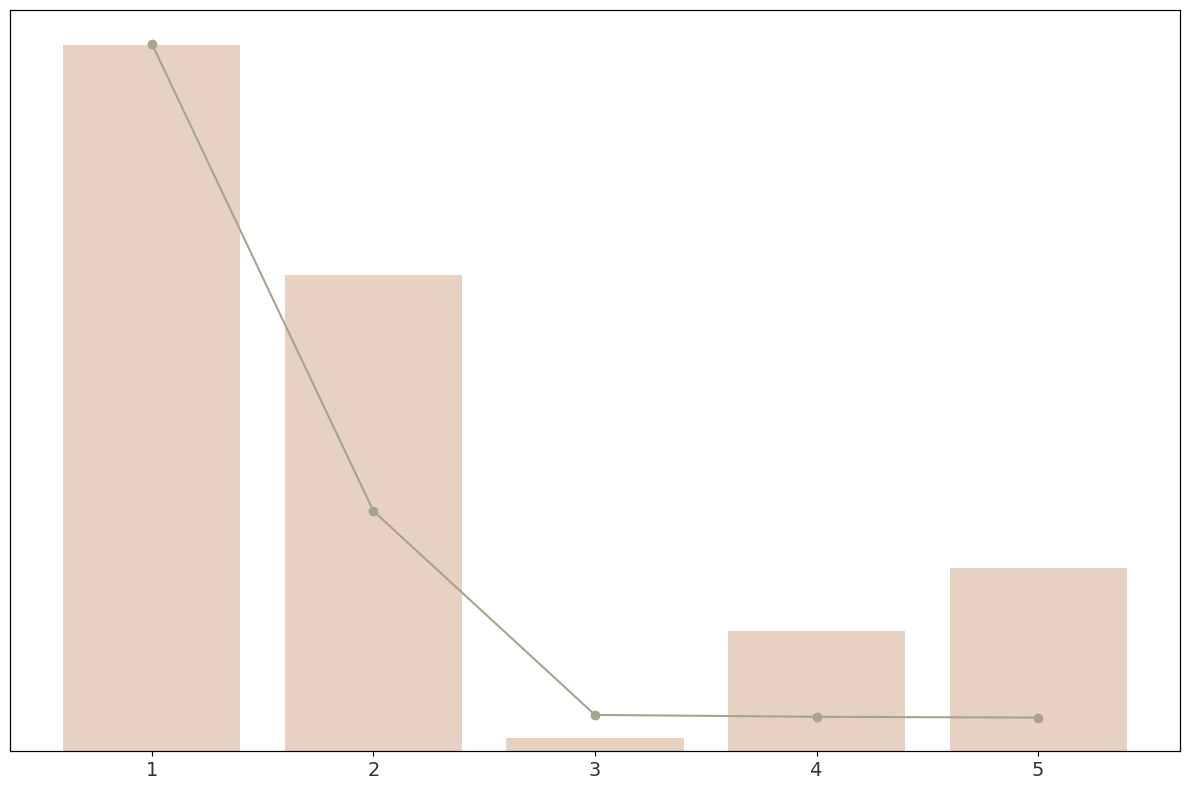

Category Numbering with Unique and Total Products:
1: FURSHINE - Unique Products: 212, Total Products: 52113
2: BOXN - Unique Products: 143, Total Products: 16866
3: FURSHINETHREE - Unique Products: 4, Total Products: 1491
4: WHITECHERRY - Unique Products: 36, Total Products: 1348
5: PINK - Unique Products: 55, Total Products: 1289


In [14]:
categories = ["FURSHINE", "BOXN", "FURSHINETHREE", "WHITECHERRY", "PINK"]
table_data = []
for category in categories:
    unique_count = meesho[meesho['Product_Name'] == category]['ProductName'].nunique()
    total_count = meesho[meesho['Product_Name'] == category].shape[0]
    table_data.append([category, unique_count, total_count])
table_df = pd.DataFrame(table_data, columns=['Category', 'Unique Products', 'Total Products'])
unique_products_color = '#ddbea9'  
total_products_color = '#a5a58d'   
fig, ax1 = plt.subplots(figsize=(12, 8))
category_numbers = range(1, len(categories) + 1)
bars = ax1.bar(category_numbers, table_df['Unique Products'], color=unique_products_color, alpha=0.7, label='Unique Products')
ax1.xaxis.label.set_visible(False) 
ax1.yaxis.label.set_visible(False)  
ax1.set_xticks(category_numbers)
ax1.set_xticklabels(category_numbers, fontsize=14, color='#333333')
ax1.set_yticks([])

ax2 = ax1.twinx() 
ax2.plot(category_numbers, table_df['Total Products'], color=total_products_color, marker='o', linestyle='-', label='Total Products')

# Hide secondary y-axis ticks
ax2.set_yticks([])

# Tight layout to avoid overlaps
fig.tight_layout()

# Show plot
plt.show()

# Print a reference table with category numbers, names, and their respective values
print("Category Numbering with Unique and Total Products:")
for i, row in table_df.iterrows():
    print(f"{i+1}: {row['Category']} - Unique Products: {row['Unique Products']}, Total Products: {row['Total Products']}")



In [15]:
# companies = ["FURSHINE", "BOXN", "FURSHINETHREE", "WHITECHERRY", "PINK"]
# first_order_dates = []

# for company in companies:
#     company_orders = meesho[meesho['Product_Name'] == company]
#     first_order_date = company_orders['OrderDate'].min()
#     first_order_dates.append([company, first_order_date])

# first_order_df = pd.DataFrame(first_order_dates, columns=['Company', 'First Order Date'])

# first_order_df['First Order Date'] = first_order_df['First Order Date'].fillna('No Data')
# first_order_df = first_order_df.sort_values(by='First Order Date', ascending=False)

# html_table = first_order_df.to_html(index=False, escape=False, formatters={
#     'First Order Date': lambda x: f'<b>{x}</b>' if x == 'No Data' else f'<b>{pd.to_datetime(x).strftime("%Y-%m-%d")}</b>'
# })

# styled_table = f'''
#     <style>
#         table {{border-collapse: collapse; width: 50%; margin: 20px auto; font-family: Arial, sans-serif; color: #333;}}
#         th, td {{border: 1px solid #ccc; text-align: left; padding: 8px;}}
#         tr:nth-child(even) {{background-color: #eddcd2;}}
#         tr:nth-child(odd) {{background-color: #fff1e6;}}
#         th {{background-color: #cb997e; color: white;}}
#         td {{background-color: #f0efeb;}}
#         tr:hover {{background-color: #ddbea9;}}
#         td b {{font-weight: bold;}}
#     </style>
#     {html_table}
# '''

# display(HTML(styled_table))

### 2nd slide

In [16]:
meesho['OrderDate'] = pd.to_datetime(meesho['OrderDate'], errors='coerce')

def plot_line_graph_for_year(df, year, category):
    df_year = df[df['OrderDate'].dt.year == year]
    df_category_year = df_year[df_year['Product_Name'] == category]
    monthly_counts = df_category_year.groupby(df_category_year['OrderDate'].dt.to_period('M')).size()
    
    plt.figure(figsize=(12, 8))
    plt.plot(monthly_counts.index.to_timestamp(), monthly_counts.values, 
             marker='o', color='#cb997e', linewidth=2.5, label=category)
    
    # Set custom x-tick labels for months
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    plt.xticks(ticks=monthly_counts.index.to_timestamp(), labels=months[:len(monthly_counts)], rotation=45,fontsize = 30)
    
    # Turn off y-axis ticks
    plt.yticks(visible=False)
    
    plt.grid(False)
    
    plt.legend()
    plt.tight_layout()
    
    plt.show()
    print(monthly_counts)


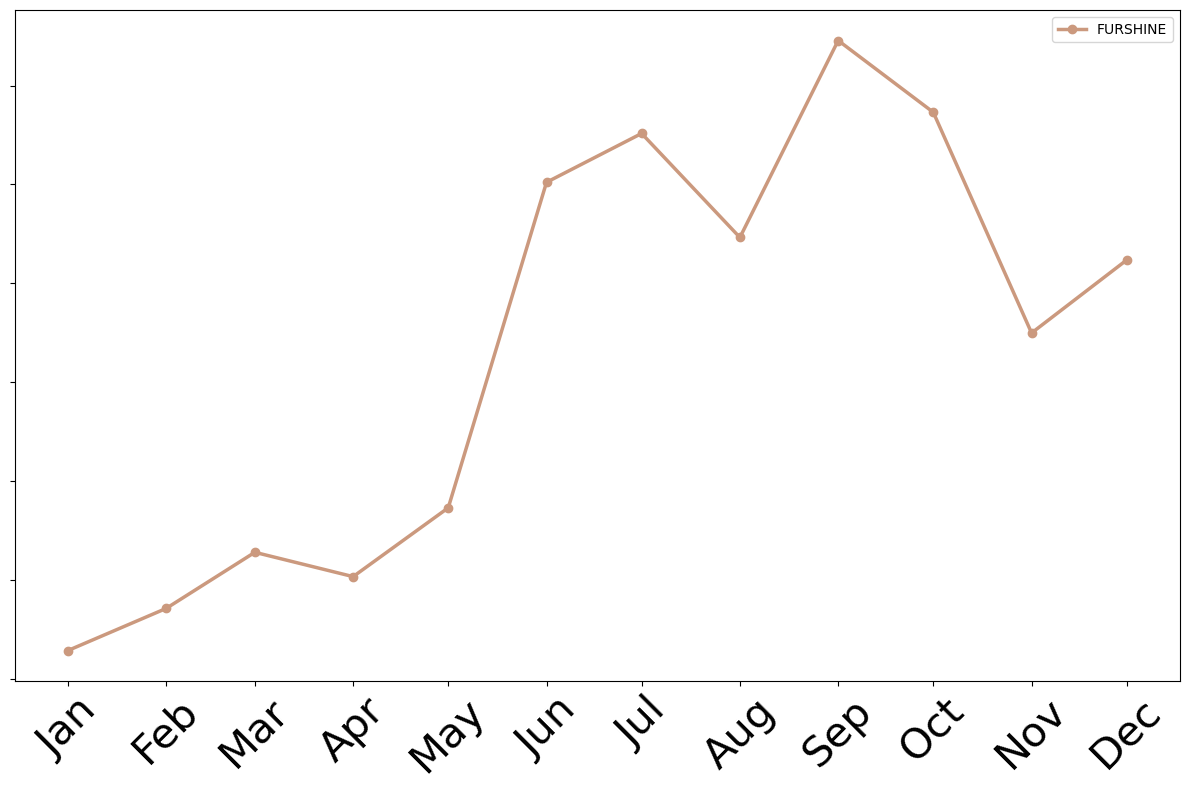

OrderDate
2023-01    1643
2023-02    1856
2023-03    2140
2023-04    2017
2023-05    2365
2023-06    4011
2023-07    4258
2023-08    3732
2023-09    4728
2023-10    4365
2023-11    3249
2023-12    3618
Freq: M, dtype: int64


In [17]:
plot_line_graph_for_year(meesho, 2023, 'FURSHINE')

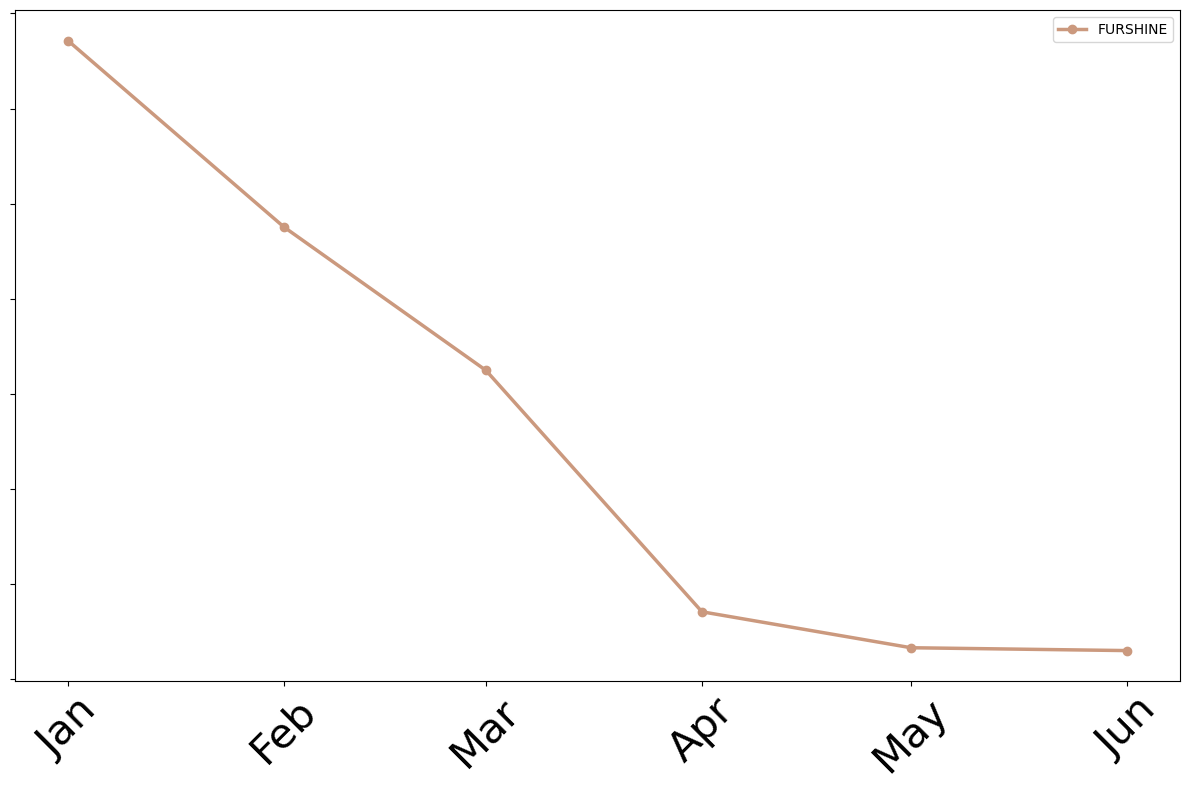

OrderDate
2024-01    3858
2024-02    2878
2024-03    2124
2024-04     855
2024-05     666
2024-06     651
Freq: M, dtype: int64


In [18]:
plot_line_graph_for_year(meesho, 2024, 'FURSHINE')

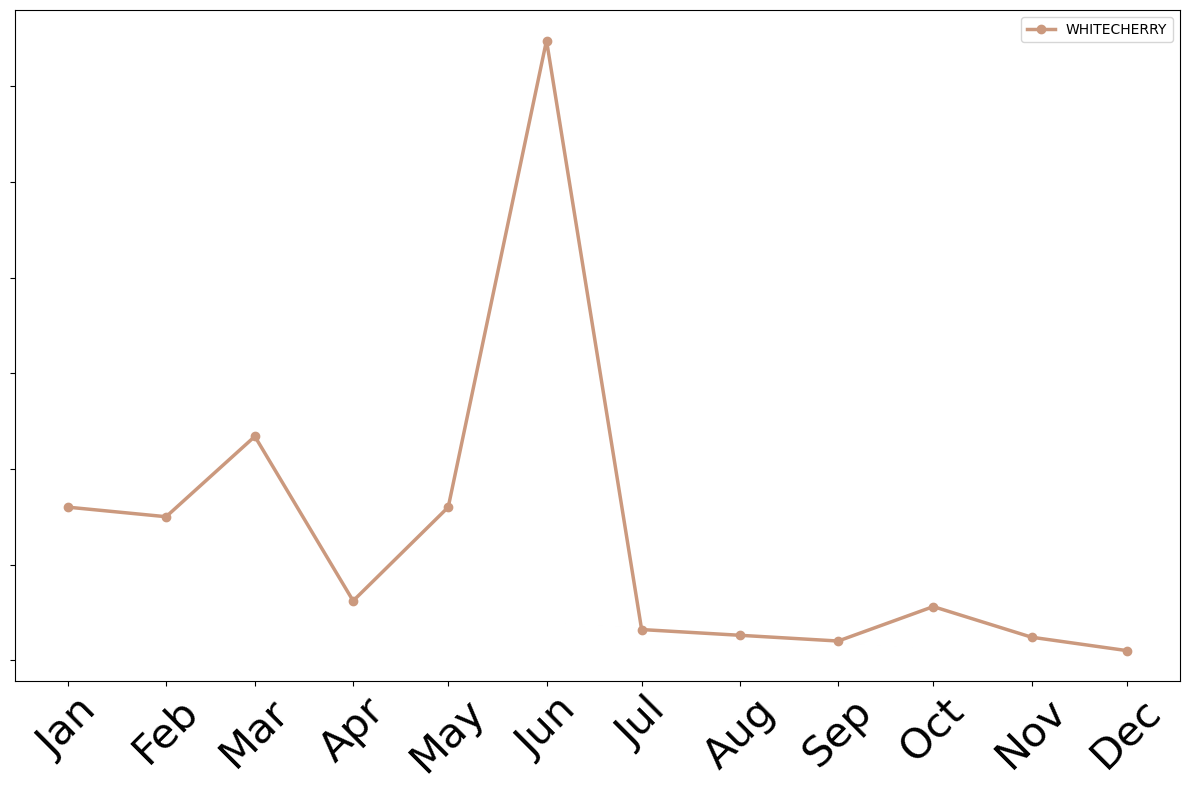

OrderDate
2023-01     80
2023-02     75
2023-03    117
2023-04     31
2023-05     80
2023-06    324
2023-07     16
2023-08     13
2023-09     10
2023-10     28
2023-11     12
2023-12      5
Freq: M, dtype: int64


In [19]:
plot_line_graph_for_year(meesho, 2023, 'WHITECHERRY')

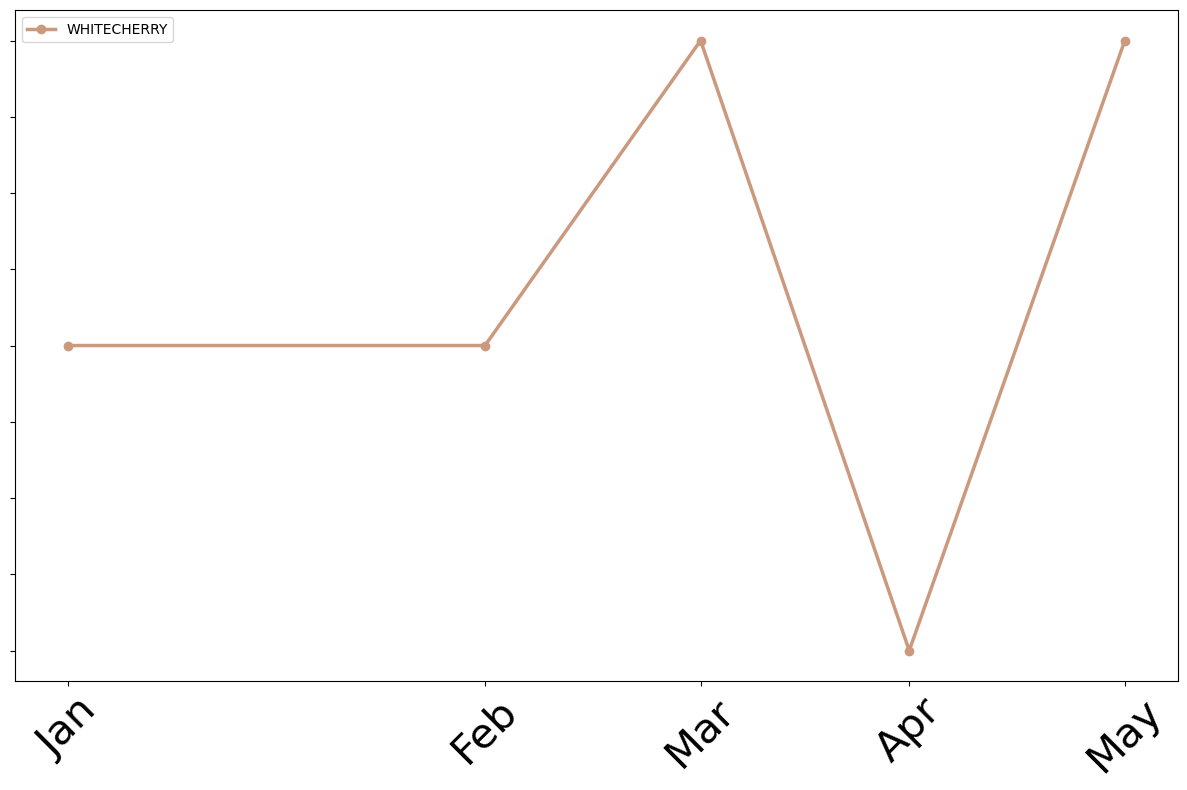

OrderDate
2024-01    2
2024-03    2
2024-04    3
2024-05    1
2024-06    3
Freq: M, dtype: int64


In [20]:
plot_line_graph_for_year(meesho, 2024, 'WHITECHERRY')

### 3rd slide

In [21]:
meesho['ReasonforCreditEntry'].value_counts()

ReasonforCreditEntry
Delivered              42036
DELIVERED              30354
CANCELLED               6326
RTO_COMPLETE            6313
Shipped                  347
SHIPPED                  342
RTO_LOCKED               127
LOST                     112
READY_TO_SHIP             88
RTO_INITIATED             87
PENDING                   66
Cancelled                 59
RTO_OFD                   37
DOOR_STEP_EXCHANGED       26
RTO_DELIVERY_FAILED        7
Name: count, dtype: int64

In [22]:
meesho['ReasonforCreditEntry'] = meesho['ReasonforCreditEntry'].str.upper()
meesho['ReasonforCreditEntry'].value_counts()

ReasonforCreditEntry
DELIVERED              72390
CANCELLED               6385
RTO_COMPLETE            6313
SHIPPED                  689
RTO_LOCKED               127
LOST                     112
READY_TO_SHIP             88
RTO_INITIATED             87
PENDING                   66
RTO_OFD                   37
DOOR_STEP_EXCHANGED       26
RTO_DELIVERY_FAILED        7
Name: count, dtype: int64

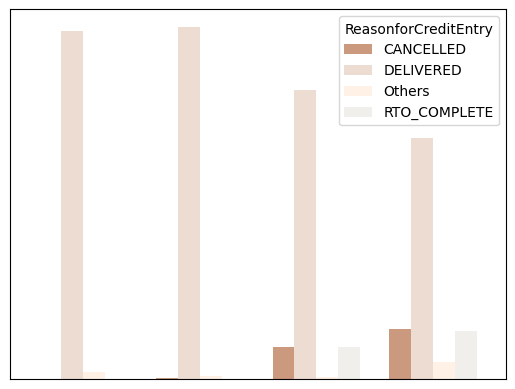

ReasonforCreditEntry      CANCELLED       DELIVERED       Others  \
Year                                                               
2019                      1 (0.02%)    6020 (98.0%)  122 (1.99%)   
2022                     30 (0.17%)  17176 (99.08%)  130 (0.75%)   
2023                   4311 (8.95%)  39248 (81.45%)  303 (0.63%)   
2024                  2043 (13.93%)   9946 (67.84%)  684 (4.67%)   

ReasonforCreditEntry   RTO_COMPLETE  
Year                                 
2019                       0 (0.0%)  
2022                       0 (0.0%)  
2023                   4324 (8.97%)  
2024                  1989 (13.57%)  


In [23]:
meesho['Year'] = meesho['OrderDate'].dt.year
categories = ['DELIVERED', 'CANCELLED', 'RTO_COMPLETE']
meesho['ReasonforCreditEntry'] = meesho['ReasonforCreditEntry'].apply(lambda x: x if x in categories else 'Others')
grouped_df = meesho.groupby(['Year', 'ReasonforCreditEntry']).size().unstack(fill_value=0)
grouped_df_percentage = grouped_df.div(grouped_df.sum(axis=1), axis=0) * 100
colors = ['#cb997e','#eddcd2','#fff1e6','#f0efeb','#ddbea9','#a5a58d']
grouped_df_percentage.plot(kind='bar', stacked=False, color=colors, width=0.75)
plt.xticks([])  
plt.yticks([])  
plt.xlabel('') 
plt.ylabel('')  
plt.title('')   
plt.show()
counts_and_percentages = grouped_df.copy()
counts_and_percentages_percentage = grouped_df_percentage.copy()
summary_table = counts_and_percentages.astype(int).astype(str) + ' (' + grouped_df_percentage.round(2).astype(str) + '%)'
print(summary_table)



In [24]:
meesho.dtypes

ReasonforCreditEntry               object
SubOrderNo                         object
OrderDate                  datetime64[ns]
CustomerState                      object
ProductName                        object
Size                               object
Quantity                            int64
SupplierListedPrice               float64
SupplierDiscountedPrice           float64
discount                          float64
Product_Name                       object
Year                                int32
dtype: object

In [25]:
meesho['Size'].value_counts()

Size
Free Size    86182
Double         119
Queen           25
King             1
Name: count, dtype: int64

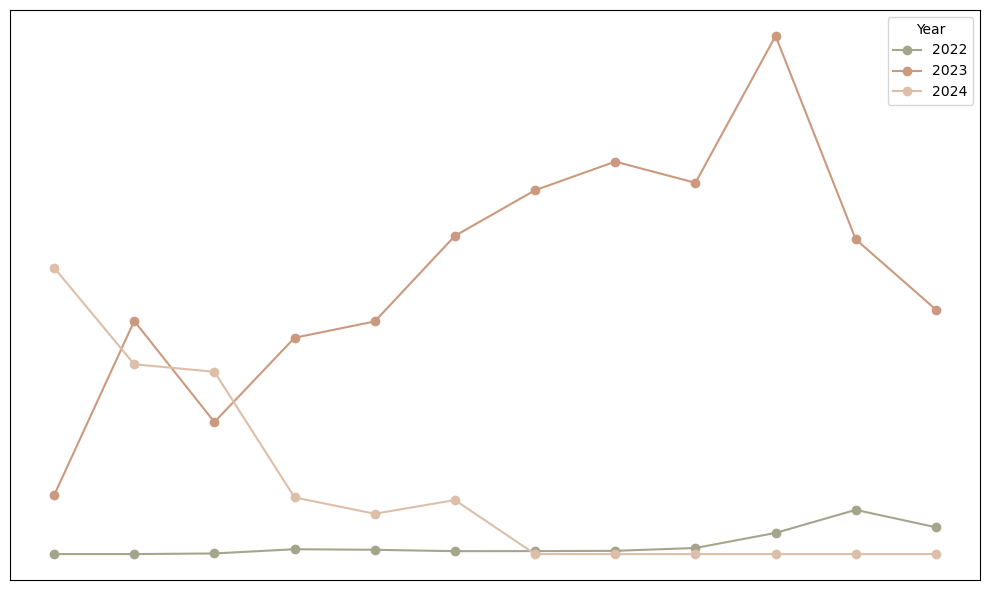

Year  Year          1          2          3          4          5          6  \
0     2022       0.00       0.00     735.73    5617.52    4962.90    3377.95   
1     2023   67924.77  269555.52  152670.56  250163.89  269041.78  367963.02   
2     2024  331166.00  219514.00  210795.00   65521.00   46661.00   62454.00   

Year          7          8          9         10         11         12  
0       3434.72    3767.49    7045.63   24478.36   51155.63   31029.77  
1     420767.80  453841.55  429320.06  599203.35  363925.40  282706.00  
2          0.00       0.00       0.00       0.00       0.00       0.00  


In [26]:
meesho['OrderDate'] = pd.to_datetime(meesho['OrderDate'])
meesho_filtered = meesho[meesho['OrderDate'].dt.year != 2019].copy()
meesho_filtered['Year'] = meesho_filtered['OrderDate'].dt.year
meesho_filtered['Month'] = meesho_filtered['OrderDate'].dt.month
monthly_discount = meesho_filtered.groupby(['Year', 'Month'])['discount'].sum().unstack(fill_value=0)
colors = ['#a5a58d', '#cb997e', '#ddbea9']  
plt.figure(figsize=(10, 6))

for i, year in enumerate(monthly_discount.index):
    plt.plot(monthly_discount.columns, monthly_discount.loc[year], 
             marker='o', color=colors[i % len(colors)], label=str(year))
plt.xticks(monthly_discount.columns, 
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.xticks([])
plt.yticks([])
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.tight_layout()
plt.show()
discount_table = monthly_discount.reset_index()
discount_table.columns.name = 'Year'
print(discount_table)

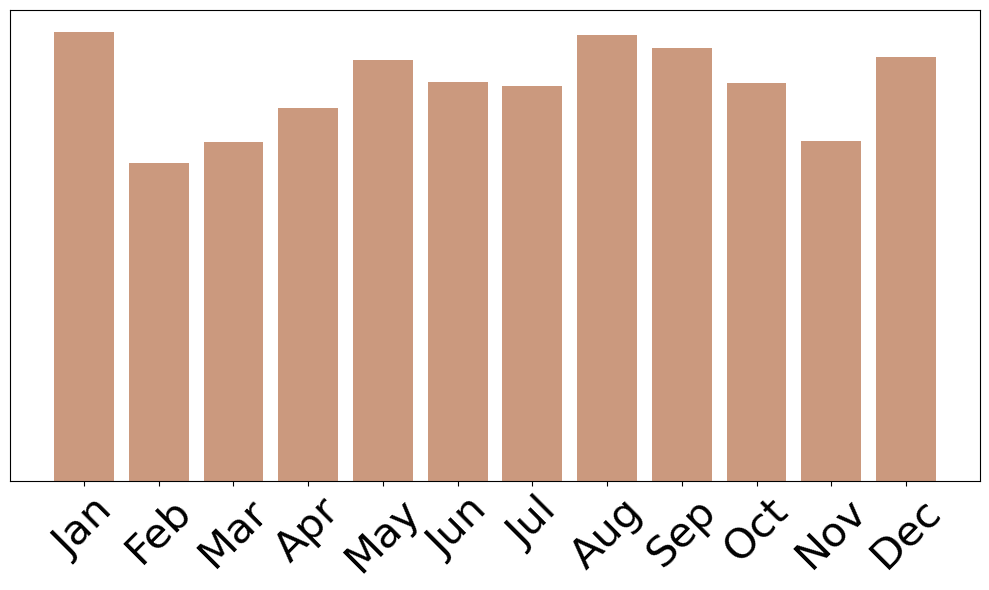

        Month  TotalCost  Quantity  AverageCost
4     January  6335920.0      7708   821.992735
3    February  6237596.0     10707   582.571775
7       March  5306450.0      8545   621.000585
0       April  4344386.0      6350   684.155276
8         May  4536906.0      5884   771.058124
6        June  6346494.0      8669   732.090668
5        July  4994701.0      6901   723.764817
1      August  4405168.0      5394   816.679273
11  September  5892769.0      7421   794.066703
10    October  6435179.0      8826   729.116134
9    November  5974183.0      9586   623.219591
2    December  6074321.0      7821   776.668073


In [27]:
meesho['OrderDate'] = pd.to_datetime(meesho['OrderDate'])  
meesho['TotalCost'] = meesho['SupplierListedPrice'] * meesho['Quantity']

meesho['Month'] = meesho['OrderDate'].dt.month_name()

monthly_cost = meesho.groupby('Month').agg({'TotalCost': 'sum', 'Quantity': 'sum'}).reset_index()
monthly_cost['AverageCost'] = monthly_cost['TotalCost'] / monthly_cost['Quantity']

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

monthly_cost['Month'] = pd.Categorical(monthly_cost['Month'], categories=month_order, ordered=True)
monthly_cost = monthly_cost.sort_values('Month')

plt.figure(figsize=(10, 6))
plt.bar(monthly_cost['Month'], monthly_cost['AverageCost'], color='#cb997e')
plt.xticks(rotation=45)
plt.xticks(monthly_cost['Month'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=30)
plt.yticks([])  
plt.tight_layout()
plt.show()

print(monthly_cost[['Month', 'TotalCost', 'Quantity', 'AverageCost']])



In [28]:
state_mapping = {
    # Andhra Pradesh
    'Andhra Pradesh': 'Andhra Pradesh',
    'andhra pradesh': 'Andhra Pradesh',
    'Andhra pradesh': 'Andhra Pradesh',
    'andhrapradesh': 'Andhra Pradesh',
    'Andhrapradesh': 'Andhra Pradesh',
    
    # Telangana
    'Telangana': 'Telangana',
    'telangana': 'Telangana',

    # Tamil Nadu
    'Tamil Nadu': 'Tamil Nadu',
    'Tamil nadu': 'Tamil Nadu',
    'tamilnadu': 'Tamil Nadu',
    'TAMIL NADU': 'Tamil Nadu',
    'TAMILNADU': 'Tamil Nadu',
    'thamilnadu': 'Tamil Nadu',
    'Tamil  Nadu': 'Tamil Nadu',

    # Karnataka
    'Karnataka': 'Karnataka',
    'karnataka': 'Karnataka',
    'KARNATAKA': 'Karnataka',
    'Karanataka': 'Karnataka',

    # Uttar Pradesh
    'Uttar Pradesh': 'Uttar Pradesh',
    'uttar pradesh': 'Uttar Pradesh',
    'Uttar pradesh': 'Uttar Pradesh',
    'Up': 'Uttar Pradesh',
    'U. P': 'Uttar Pradesh',
    'U.P.': 'Uttar Pradesh',
    'uttarpradesh': 'Uttar Pradesh',
    'unnao up': 'Uttar Pradesh',

    # Maharashtra
    'Maharashtra': 'Maharashtra',
    'maharashtra': 'Maharashtra',
    'MAHARASHTRA': 'Maharashtra',
    'MahArashtra': 'Maharashtra',

    # West Bengal
    'West Bengal': 'West Bengal',
    'west Bengal': 'West Bengal',
    'west  bengal': 'West Bengal',
    'Westbengal': 'West Bengal',
    'WestBengal': 'West Bengal',
    'WEST Bengal': 'West Bengal',

    # Delhi
    'Delhi': 'Delhi',
    'delhi': 'Delhi',

    # Gujarat
    'Gujarat': 'Gujarat',
    'gujarat': 'Gujarat',
    'Gujrat': 'Gujarat',
    'GUJARAT': 'Gujarat',

    # Odisha
    'Odisha': 'Odisha',
    'Odisa': 'Odisha',
    'odisha': 'Odisha',
    'Odissa': 'Odisha',
    'ODISHA': 'Odisha',

    # Rajasthan
    'Rajasthan': 'Rajasthan',
    'rajasthan': 'Rajasthan',
    'Rajsthan': 'Rajasthan',

    # Punjab
    'Punjab': 'Punjab',
    'punjab': 'Punjab',
    'PUNJAB': 'Punjab',

    # Haryana
    'Haryana': 'Haryana',
    'haryana': 'Haryana',
    'HARYANA': 'Haryana',

    # Madhya Pradesh
    'Madhya Pradesh': 'Madhya Pradesh',
    'madhya Pradesh': 'Madhya Pradesh',
    'madhyapradesh': 'Madhya Pradesh',
    'Madhaya Pradesh': 'Madhya Pradesh',

    # Jammu and Kashmir
    'Jammu & Kashmir': 'Jammu and Kashmir',
    'J&K': 'Jammu and Kashmir',
    'Jammu And Kashmir': 'Jammu and Kashmir',

    # Ladakh
    'Ladakh': 'Ladakh',

    # Kerala
    'Kerala': 'Kerala',
    'kerala': 'Kerala',
    'KERALA': 'Kerala',

    # Bihar
    'Bihar': 'Bihar',
    'bihar': 'Bihar',

    # Assam
    'Assam': 'Assam',
    'assam': 'Assam',

    # Meghalaya
    'Meghalaya': 'Meghalaya',

    # Jharkhand
    'Jharkhand': 'Jharkhand',
    'jharkhand': 'Jharkhand',

    # Chhattisgarh
    'Chhattisgarh': 'Chhattisgarh',
    'chhattisgarh': 'Chhattisgarh',
    'CHHATTISGARH': 'Chhattisgarh',

    # Himachal Pradesh
    'Himachal Pradesh': 'Himachal Pradesh',

    # Tripura
    'Tripura': 'Tripura',
    'tripura': 'Tripura',

    # Arunachal Pradesh
    'Arunachal Pradesh': 'Arunachal Pradesh',

    # Mizoram
    'Mizoram': 'Mizoram',

    # Chandigarh
    'Chandigarh': 'Chandigarh',

    # Goa
    'Goa': 'Goa',

    # Nagaland
    'Nagaland': 'Nagaland',

    # Manipur
    'Manipur': 'Manipur',
    'manipur': 'Manipur',

    # Sikkim
    'Sikkim': 'Sikkim',

    # Uttarakhand
    'Uttarakhand': 'Uttarakhand',
    'uttarakhand': 'Uttarakhand',
    'Uttrakhand': 'Uttarakhand',

    # Pudhucherry / Puducherry
    'Pudhucherry': 'Puducherry',
    'Puducherry': 'Puducherry',

    # Andaman and Nicobar Islands
    'Andaman & Nicobar Islands': 'Andaman and Nicobar Islands',
    'Andaman and Nicobar Islands': 'Andaman and Nicobar Islands',

    # Dadra & Nagar Haveli & Daman & Diu
    'Dadra & Nagar Haveli & Daman & Diu': 'Dadra and Nagar Haveli and Daman and Diu',
    'Dadra and Nagar Haveli and Daman and Diu': 'Dadra and Nagar Haveli and Daman and Diu',
    'Dadra and Nagar Haveli & Daman & Diu': 'Dadra and Nagar Haveli and Daman and Diu',

    # Others
    'Others': 'Others',
    'India': 'Others',
    'Alipur': 'Others',
    'Pallisaradhi': 'Others',
}


In [29]:
meesho['CustomerState_cleaned'] = meesho['CustomerState'].str.strip().str.title().replace(state_mapping)
meesho_cleaned = meesho['CustomerState_cleaned'].dropna()
unique_state_count = meesho_cleaned.nunique()
print(f'Total unique states: {unique_state_count}')
print(meesho_cleaned.unique())

Total unique states: 49
['West Bengal' 'Tamil Nadu' 'Madhya Pradesh' 'Bihar' 'Telangana'
 'Karnataka' 'Uttar Pradesh' 'Assam' 'Andhra Pradesh' 'Jharkhand'
 'Meghalaya' 'Gujarat' 'Haryana' 'Delhi' 'Rajasthan' 'Kerala' 'Odisha'
 'Maharashtra' 'Jammu and Kashmir' 'Uttarakhand' 'Puducherry'
 'Chhattisgarh' 'Andaman and Nicobar Islands' 'Tamilnadu'
 'Himachal Pradesh' 'Tripura' 'Arunachal Pradesh' 'Punjab' 'Mizoram'
 'Chandigarh' 'Goa' 'Kolkata' 'Andaman And Nicobar Islands' 'Uttarpradesh'
 'Nagaland' 'Manipur' 'Sikkim' 'Thamilnadu' 'Daman & Diu' 'Ladakh'
 'West  Bengal' 'Others' 'Unnao Up'
 'Dadra and Nagar Haveli and Daman and Diu'
 'Dadra And Nagar Haveli And Daman And Diu' 'Andrapradesh' 'Madhyapradesh'
 'Karnatka' 'West Tripura']


In [30]:
state_cost = meesho.groupby('CustomerState')['TotalCost'].sum().reset_index()
state_cost = state_cost.sort_values(by='TotalCost', ascending=False)
print(state_cost)


      CustomerState  TotalCost
73    Uttar Pradesh  5555567.0
63       Tamil Nadu  5273101.0
32        Karnataka  3068195.0
41      Maharashtra  2817186.0
3    Andhra Pradesh  2250561.0
..              ...        ...
24              J&K      531.0
38  Madhaya Pradesh      235.0
29        KARNATAKA      199.0
30           KERALA      167.0
0            Alipur      120.0

[120 rows x 2 columns]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


   Customer State  Order Count  Total Cost
0  Andhra Pradesh         2474   2290429.0
1           Bihar         2277   2076276.0
2       Karnataka         3405   3091602.0
3  Madhya Pradesh         1719   1597133.0
4     Maharashtra         3092   2840540.0
5       Rajasthan         1984   1920601.0
6      Tamil Nadu         5558   5306517.0
7       Telangana         2337   2213230.0
8   Uttar Pradesh         6021   5601178.0
9     West Bengal         2155   1963009.0


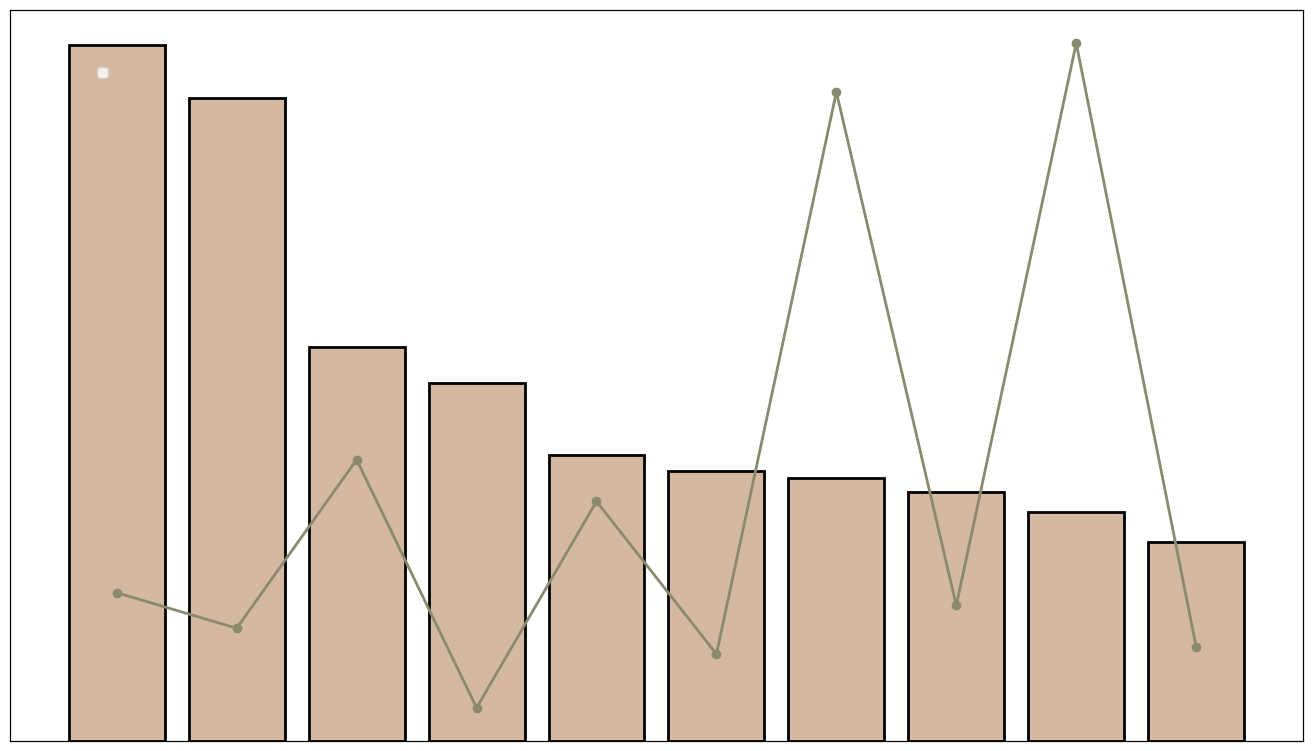

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'meesho' DataFrame is already loaded
meesho['TotalCost'] = pd.to_numeric(meesho['TotalCost'], errors='coerce')

# Get the top 10 states
top_states_meesho = meesho['CustomerState_cleaned'].value_counts().head(10).index
filtered_meesho = meesho[meesho['CustomerState_cleaned'].isin(top_states_meesho)]

# Calculate total cost and order counts
state_total_cost_meesho = filtered_meesho.groupby('CustomerState_cleaned')['TotalCost'].sum()
state_counts_meesho = filtered_meesho['CustomerState_cleaned'].value_counts()

# Combine total costs and order counts into a single DataFrame
state_summary_meesho = pd.DataFrame({
    'Order Count': state_counts_meesho,
    'Total Cost': state_total_cost_meesho
}).reset_index()

# Rename the columns for clarity
state_summary_meesho.columns = ['Customer State', 'Order Count', 'Total Cost']

# Print the table
print(state_summary_meesho)

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 8))
bar_color_meesho = '#d5b8a1'
bars = ax1.bar(state_counts_meesho.index, state_counts_meesho.values, color=bar_color_meesho, edgecolor='black', linewidth=2)
ax1.tick_params(axis='y', labelcolor=bar_color_meesho)

ax2 = ax1.twinx()
line_color_meesho = '#8a8a6e'
line = ax2.plot(state_total_cost_meesho.index, state_total_cost_meesho.values, color=line_color_meesho, marker='o', linewidth=2)

plt.title('')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

ax1.set_xlabel('')
ax1.set_ylabel('')
ax2.set_ylabel('')

# Increase font size for x-tick labels
plt.xticks([])  # Change to 14 or desired size
ax1.set_yticks([])  
ax2.set_yticks([]) 

plt.show()



In [33]:
meesho.dtypes

ReasonforCreditEntry               object
SubOrderNo                         object
OrderDate                  datetime64[ns]
CustomerState                      object
ProductName                        object
Size                               object
Quantity                            int64
SupplierListedPrice               float64
SupplierDiscountedPrice           float64
discount                          float64
Product_Name                       object
Year                                int32
TotalCost                         float64
Month                              object
CustomerState_cleaned              object
dtype: object

In [34]:
meesho.to_csv('updated_messho.csv')